# Лабораторная работа №4
## Решение оптимизационных задач с помощью генетических алгоритмов


# Задание

Лабораторная работа состоит из двух частей:

I. Использование генетического алгоритма для оптимизации раскладки клавиатуру для заданных слов;

II. Использование генетических алгоритмов для обучения интеллектуальных агентов.

Для выполнениче части I. требуется проделать следующие шаги:
1. Загрузить необходимые файлы (вариант со списком слов, макет клавиатуры и набор шрифтов).
2. Загрузить файл клавиатуры и шрифта в GoogleColab
3. Выбрать 3 слова согласно варианту и для каждого найти оптимальные раскладки клавиатуры, и визуализировать их с помощью макета и набора шрифтов. Если в слове присутствует **дефис**, то либо заменить на пробел, либо писать слитно.


Для выполнение части II. требуется выполнить следующие шаги:
1. Выбрать одну из предложенных игр с реализацией на JavaScript.
2. Обучить интеллектуального агента с помощью генетического алгоритма в среде без графического интерфейса на Python. В случае необходимости модифицировать код для получения лучших результатов.
3. Проверить качество агента в первоначальной среде на JavaScript.

Критерием выполнения II. части лабораторной работы является продолжительность жизни интеллектуального агента по результатам 3 партий. Среднее значение должно равняться не менее 30 секунд. **При этом агент НЕ должен бездействовать**.

Лабораторные выполняются на платформе Google Colab - просто перейдите по ссылке в начале ноутбука. Также можно работать с ноутбуками лабораторных локально.

Отчет должен содержать: титульный лист, задание с вариантом, скриншоты и краткие пояснения по каждому этапу лабораторной работы.

#Варианты для Задания
Варианты и материалы для выполнения лабораторной работы доступны по [ссылке ЯндексДиск](https://disk.yandex.ru/d/0iuecfh0amQGmA)

Пример варианта для студента ИУ5-72Б, 4ый по списку в группе:

Часть 1. Слова для оптимизации: сложное слово "разглагольствовать", нормальное слово "видеоконференция", лёгкое слово "бакалавриат"

Часть 2 (для всех одинаково). Уровень сложности **Easy** - *Snake*, уровень сложности **Medium** - *PingPong*, уровень сложности **Hard** - *DoodleJump*


#Контрольные вопросы
1. Что такое генетический алгоритм
2. К какому алгоритмическому семейству относится 
3. Этапы генетического алгоритма
4. Что такое функция приспособленности
5. Что такое популяция
6. Что такое поколение
7. Что такое хромосома
8. Что такое ген
9. Объясните этап _ генетического алгоритма
10. Что такое элитизм
11. Что такое рулеточный отбор
12. Что такое глобальный экстремум функции 
13. Гарантирует ли ГА нахождения глобального экстремума
14. Что лучше: 10 раз оптимизировать с нуля ГА в течение 100 поколений или 1 раз оптимизировать с нуля ГА в течение 1000 поколений
15. Требуется ли для использования ГА дифференцируемость функции приспособленности
16. Когда использование ГА предпочтительнее стохастического градиентного спуска
17. Какие задачи можно решать при помощи ГА

#Материалы по теме
1. [Статья, RU | Просто о сложном про ГА](https://habr.com/ru/post/128704)
2. [Видео, ENG | Поиск кратчайшего пути с помощью ГА](https://www.youtube.com/watch?v=X1VuqBYCGK4)
3. Анимация | Нахождение экстремума

![](https://engineering.purdue.edu/gekcogrp/methodology/GENES/genes_img/2sinc_opt_title.gif)
4. [Видео, ENG | Применение ГА для преодоления препятствий](https://www.youtube.com/watch?v=Gl3EjiVlz_4)
5. [Видео, ENG | Применение ГА для дуэльной игры](https://www.youtube.com/watch?v=u2t77mQmJiY)
6. [Видео, ENG | Применение ГА для проектирования американских горок](https://www.youtube.com/watch?v=4l5MGqrAItU)
7. [Статья, ENG | Применение генетических алгоритмов ](https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/)

![Анимация | Нахождение параметров полинома](https://pablormier.github.io/assets/img/de/curve-fitting.gif)
8. [Статья, ENG | Теория генетических алгоритмов ](http://www.feat.engineering/genetic-algorithms.html)
9. [Демо | Обучение ходьбе](https://rossning92.github.io/genetic-algorithm)

![](https://raw.githubusercontent.com/rossning92/genetic-algorithm/master/images/demo.gif)
10. [Видео | Игра в FlappyBird](https://www.youtube.com/watch?v=aeWmdojEJf0)

![](https://raw.githubusercontent.com/ssusnic/Machine-Learning-Flappy-Bird/master/screenshots/flappy_06.png)
11. [Демо | Прохождение лабиринта](https://gazijarin.github.io/AdamAI)
12. [Видео, ENG | Оптимизация раскладки клавиатуры ](https://www.youtube.com/watch?v=EOaPb9wrgDY)
13. [Видео, ENG | Генетический алгоритм для обучения змейки ](https://www.youtube.com/watch?v=tjQIO1rqTBE)




# Часть 1

## Импортирование необходимых библиотек

In [14]:
import json
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

## Инициализация слов для оптимизации

In [15]:
# ЗДЕСЬ ВПИСЫВАЕТЕ СЛОВА ПО ВАРИАНТУ
messages = [np.random.choice(['объектноориентированное', 'картографирование', 'переобучение'], size=1000)]

# тут необходимая подготовка, чтобы быстро считать функцию приспособленности
df = pd.DataFrame(dict(msg=np.concatenate(messages)))
df.msg = df.msg.str.lower()
df.msg = df.msg.str.replace('ё', 'е').str.replace(u'\xa0', u' ').str.replace(u'\-', u' ')
df.msg = df.msg.str.replace('[^a-zа-я0-9\s?,.!]', '')

sequence = list(''.join(df[~df.msg.isna()].msg.values))
charmap = np.unique(sequence)

diffs_mask = df[~df.msg.isna()].msg.str.len().cumsum().values.copy()[:-1] - 1
diffs_boolean_mask = np.ones(len(sequence)-1, dtype=np.bool8)
diffs_boolean_mask[diffs_mask] = 0
sequence = list(''.join(df[~df.msg.isna()].msg.values))
bisequence = (pd.Series(sequence[:-1])+pd.Series(sequence[1:]))
BISEQUENCE_FREQS = bisequence.loc[diffs_boolean_mask].value_counts().reset_index()
BISEQUENCE_FREQS.columns = ['biseq', 'freq']
BISEQUENCE_FREQS

C:\Users\Zid\AppData\Local\Temp\ipykernel_15072\1148999923.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df.msg = df.msg.str.replace('ё', 'е').str.replace(u'\xa0', u' ').str.replace(u'\-', u' ')
C:\Users\Zid\AppData\Local\Temp\ipykernel_15072\1148999923.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.msg = df.msg.str.replace('[^a-zа-я0-9\s?,.!]', '')


,biseq,freq
0,ие,1000
1,ни,676
2,ва,671
3,ов,671
4,ан,671
5,ир,671
6,ро,671
7,об,653
8,ен,653
9,но,648


## Инициализация раскладки клавиатуры

In [16]:
FIRST_ROW = [list('1234567890')]
SECOND_ROW = [list('йцукенгшщзх')]
THIRD_ROW = [list('фывапролджэ')]
FOURTH_ROW = [list('ячсмитьбю')]
FIFTH_ROW = [list(', .\n')]
ROWS = [FIRST_ROW, SECOND_ROW, THIRD_ROW, FOURTH_ROW, FIFTH_ROW]

KEYBINDS = \
[
# first row
[(68,68), (174, 68), (280, 68), (385, 68), (485, 68),
 (585, 68), (685, 68), (790, 68), (905, 68), (1010, 68)],
# second row
[(60, 201),(155, 201),(255, 201),(345, 201),(445, 201),
 (540, 201),(635, 201),(730, 201),(820, 201),(920, 201),(1015, 201)],
# third row
[(60, 350),(155, 350),(255, 350),(345, 350),(445, 350),
 (540, 350),(635, 350),(730, 350),(820, 350),(920, 350),(1015, 350)],
# fourth row
[(155, 500),(255, 500),(345, 500),(445, 500),
 (540, 500),(635, 500),(730, 500),(820, 500),(920, 500)],
# fifth row
[(224, 645),(530, 645),(855, 645),(980, 645)],
]

## Создание раскладки клавиатуры по заданному шаблону

In [17]:
def generate_one():
    # mapper это наша хромосома одной особи
    mapper = {}
    for k, row in enumerate(ROWS):
        for chng, row_lang in enumerate(row):
            for i, s in enumerate(row_lang):
                mapper[s] = (KEYBINDS[k][i][0]//10, KEYBINDS[k][i][1]//10)
    return mapper

## Функция отрисовки раскладки

In [18]:
def plot_keyboard(mapper, generation=0):
    keyboard_img = Image.open('keyboard.png').convert('RGB')
    d = ImageDraw.Draw(keyboard_img)
    font = ImageFont.truetype("Roboto-Bold.ttf", 30)
    for s, v in mapper.items():
        if s=='\n':
            s = 'Ent'
        if s==' ':
            s = '__'
        x, y = v[0]*10, v[1]*10

        d.text((x, y), s, font=font, fill=(255, 255, 255, 255))
    return keyboard_img.resize((500, 250))

Проверим, что отрисовалось правильно

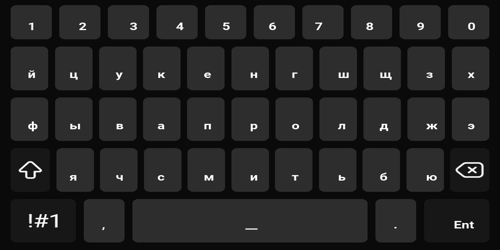

In [19]:
plot_keyboard(generate_one())

## Зададим функцию приспособленности

In [20]:
# функция приспособленности должна минимизировать расстояние,
# требуемое для написания слов
def get_scores(population):
    scores = []
    for new_mapper in population:
        cache = {}
        for i in charmap:
            for j in charmap:
                cache[i+j] = \
                    np.square(np.array(new_mapper.get(i, [-100, -100])) -
                              np.array(new_mapper.get(j, [-100, -100]))).sum()**0.5

        weights = BISEQUENCE_FREQS.biseq.map(cache)
        scores.append(BISEQUENCE_FREQS['freq'].dot(weights))
    return scores

## Зададим функции мутации и скрещивания

In [21]:
def mutation(thingey, mutation_rate=0.05):
    # мутация меняет местами mutation_rate*100 % клавиш друг с другом 
    keys = list(thingey.keys())
    values = list(thingey.values())

    mutation = (np.random.random(size=len(values))<mutation_rate).nonzero()[0]
    swap_index_to = np.random.choice(len(values),
                                     size=len(values),
                                     replace=False)

    new_values = np.array(values)
    for i, j in zip(mutation, swap_index_to[mutation]):
        new_values[[i,j]] = new_values[[j,i]]

    return {k:v for k,v in zip(keys, new_values)}

def crossover(thingeyA, thingeyB):
    # скрещивание между двумя особями заменяет n-ое количество клавиш 1ой особи
    # n-ым количеством клавиш второй особи с сохранением 
    # порядка их встречаемости на раскладке (приоритет сверху-вниз, слево-направо) 
    keysA = list(thingeyA.keys())
    valuesA = list(thingeyA.values())

    keysB = list(thingeyB.keys())
    valuesB = list(thingeyB.values())

    ranksA = np.argsort(keysA)

    keysA = np.array(keysA)[ranksA].copy()
    keysB = np.array(keysB)[ranksA].copy()
    valuesA = np.array(valuesA)[ranksA].copy()
    valuesB = np.array(valuesB)[ranksA].copy()

    offset = np.random.randint(1, max(2, len(valuesA)-1))
    offspring = {k:v for k, v in zip(keysA[:offset], valuesA[:offset])}

    keysO = list(offspring.keys())
    valuesO = list(offspring.values())

    keys_rest = list(filter(lambda k: k not in offspring, thingeyB.keys()))
    valuesRest = valuesA[offset:]
    values = valuesB[offset:]
    ranking = (
        values + 
        (np.max(values)+1)**np.arange(len(values[0])).reshape(1, -1)
               ).sum(axis=1).argsort()
    for k, v in zip(keys_rest, valuesRest[ranking]):
        offspring[k] = v

    # проверка что клавиши не потерялись и не задублировались
    assert set(offspring.keys()
    ).symmetric_difference(thingeyA.keys()).__len__()==0
    assert set(map(tuple, offspring.values())
    ).symmetric_difference(set(map(tuple, thingeyA.values()))).__len__()==0
    return offspring

## Зададим функции генерации начальной популяции и новой

In [22]:
def generate_initial(POPULATION_SIZE, mrate=0.0):
    # первая раскладка неизменённая (может быть лучшее решение)
    population = [mutation(generate_one(), mutation_rate=0.0)]

    # остальные со случайными перестановками клавиш
    for _ in range(max(0, POPULATION_SIZE - 1)):
        population.append(mutation(generate_one(), mutation_rate=mrate))
    return population

def generate_new_population(population, scores,
                            population_size=10,
                            elite_topk=1,
                            random_size=2,
                            ):
    new_population = []
    # элитизм
    for topK in range(elite_topk):
        new_population.append(population[np.argsort(scores)[topK]].copy())
    # трансформация функции приспособленности
    # оценка -> ранг -> экспоненцирование -> нормализация
    scores_ranks = scores.copy()
    for i, r in enumerate(np.argsort(scores)):
        scores_ranks[r] = i
    scores_ranks = np.exp(-np.array(scores_ranks)/len(scores_ranks)*4)
    scores_ranks /= scores_ranks.sum()

    # рулеточный отбор особей для продолжения потомства
    for _ in range(max(0, population_size - elite_topk - random_size)):
        parentA, parentB = np.random.choice(len(scores), size=2, replace=True, p=scores_ranks)
        new_population.append(mutation(crossover(population[parentA], population[parentB])))
    # добавление особей со стороны
    for _ in range(max(0, random_size)):
        if np.random.random() < 0.5:
            # полностью случайная раскладка с перемешанными клавишами
            new_population.append(mutation(generate_one(), 1.0))
        else:
            # случайно изменённая лучшая (hill climbing)
            new_population.append(mutation(new_population[0]))

    return new_population

## Осуществим оптимизацию раскладки клавиатуры с помощью генетического алгоритма

In [23]:
POPULATION_SIZE = 200
ELITISM_TOPK = 10
RANDOM_SIZE = 100
NUM_GENERATIONS = 25
NUM_RESTARTS = 10

bscore = np.inf
stats = []
for restart in range(NUM_RESTARTS):
    print('Рестарт: %d' % (restart+1))
    population = generate_initial(POPULATION_SIZE, 1.0)
    for generation in range(NUM_GENERATIONS):
        scores = get_scores(population)
        population = generate_new_population(population, scores,
                                            POPULATION_SIZE,
                                            ELITISM_TOPK,
                                            RANDOM_SIZE)
        stats.append((generation, min(scores), max(scores), np.mean(scores)))
        if min(scores) < bscore:
            bscore = min(scores)
            bimg = plot_keyboard(population[0], generation)
            print(('Поколение: %d\tЛучшее расстояние: %.1f\t'
                   'Худшее расстояние: %.1f\t'
                   'Среднее расстояние в популяции: %.1f')%stats[-1])

Рестарт: 1
Поколение: 0	Лучшее расстояние: 479036.5	Худшее расстояние: 1014809.8	Среднее расстояние в популяции: 780395.6
Поколение: 1	Лучшее расстояние: 468780.2	Худшее расстояние: 1044133.4	Среднее расстояние в популяции: 712642.1
Поколение: 2	Лучшее расстояние: 448609.1	Худшее расстояние: 1019331.5	Среднее расстояние в популяции: 669533.5
Поколение: 3	Лучшее расстояние: 434169.2	Худшее расстояние: 977892.3	Среднее расстояние в популяции: 631891.9
Поколение: 4	Лучшее расстояние: 427781.7	Худшее расстояние: 1034950.0	Среднее расстояние в популяции: 642641.8
Поколение: 5	Лучшее расстояние: 423157.3	Худшее расстояние: 985542.8	Среднее расстояние в популяции: 641409.8
Поколение: 6	Лучшее расстояние: 412124.0	Худшее расстояние: 950419.0	Среднее расстояние в популяции: 644363.1
Поколение: 9	Лучшее расстояние: 405716.6	Худшее расстояние: 951031.3	Среднее расстояние в популяции: 623487.5
Поколение: 14	Лучшее расстояние: 403996.5	Худшее расстояние: 1018397.8	Среднее расстояние в популяции: 64

## Отобразим лучшую раскладку

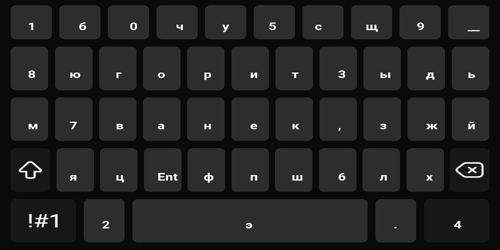

In [24]:
bimg

Как можно увидеть, все буквы слова "приветик" собрались в одном месте. Кроме того, ГА расположил "и" по центру, таким образом обход по буквам п->р->и->в->е->т->и->к минимизируется. После 10 повторных запусков ГА минимальное найденное расстояние оказалось равным 82560.2. Это в два раза меньше чем у стандартной раскладки клавиатуры.

# Часть 2

## Snake

### Загрузка нужных библиотек 

In [25]:
import json
import random
import numpy as np

### Объявление глобальных переменных

In [26]:
width = 400
height = 400
grid = 16
count = 0
snake = dict(x=160, y=160, dx=grid, dy=0, cells=[], maxCells=4)
apple = dict(x=320, y=320)

### Логика игры

In [27]:
def restart():
    snake = dict(x=160, y=160, dx=grid, dy=0, cells=[], maxCells=4)
    apple = dict(x=320, y=320)
    return snake, apple


def generate_apple(apple):
    apple['x'] = random.randint(0, 25) * grid
    apple['y'] = random.randint(0, 25) * grid


def loop(snake, apple):
    snake['x'] += snake['dx']
    snake['y'] += snake['dy']

    if snake['x'] < 0:
        snake['x'] = width - grid
    elif snake['x'] >= width:
        snake['x'] = 0

    if snake['y'] < 0:
        snake['y'] = height - grid
    elif snake['y'] >= height:
        snake['y'] = 0

    snake['cells'] = [(snake['x'], snake['y'])] + snake['cells']

    if len(snake['cells']) > snake['maxCells']:
        snake['cells'].pop()

    for index, cell in enumerate(snake['cells']):
        if cell[0] == apple['x'] and cell[1] == apple['y']:
            snake['maxCells'] += 1
            generate_apple(apple)

        for i in range(index + 1, len(snake['cells'])):
            # snake occupies same space as a body part. reset game
            if (cell[0] == snake['cells'][i][0] and
                cell[1] == snake['cells'][i][1]):
                return -1#restart(snake, apple)

    return 0

### Действия агента

In [28]:
actionMap = {0: 37, 1: 38, 2: 39, 3: 40}

def apply_action(snake, actionId):
    key = actionMap[actionId]

    if (key == 37 and snake['dx'] == 0):
        snake['dx'] = -grid
        snake['dy'] = 0
    elif (key == 38 and snake['dy'] == 0):
        snake['dx'] = 0
        snake['dy'] = -grid
    elif (key == 39 and snake['dx'] == 0):
        snake['dx'] = grid
        snake['dy'] = 0
    elif (key == 40 and snake['dy'] == 0):
        snake['dx'] = 0
        snake['dy'] = grid

### Признаки для интеллектуального агента

In [29]:
def get_features(snake, apple):
    sensors = [
        np.sign(snake['dx']),
        np.sign(snake['dy']),
        (snake['x'] - snake['cells'][-1][0])/width if len(snake['cells']) else 0,
        (snake['y'] - snake['cells'][-1][1])/height if len(snake['cells']) else 0,
        snake['x'] == apple['x'],
        snake['y'] == apple['y'],
        (snake['x'] - apple['x'])/width>0,
        (snake['x'] - apple['x'])/width<0,
        (snake['y'] - apple['y'])/height>0,
        (snake['y'] - apple['y'])/height<0,
        any([(snake['x'] == cell[0] and snake['dy'] == 0) for cell in snake['cells'][1:]]),
        any([(snake['y'] == cell[1] and snake['dx'] == 0) for cell in snake['cells'][1:]]),
        any([(snake['x'] == cell[0] and snake['dy'] > 0) for cell in snake['cells'][1:]]),
        any([(snake['y'] == cell[1] and snake['dx'] > 0) for cell in snake['cells'][1:]]),
        any([(snake['x'] == cell[0] and snake['dy'] < 0) for cell in snake['cells'][1:]]),
        any([(snake['y'] == cell[1] and snake['dx'] < 0) for cell in snake['cells'][1:]]),
    ]
    return sensors

%timeit get_features(snake, apple)

4.32 µs ± 212 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### "Мозги" интеллектуального агента

In [30]:
def get_one():
    W = np.random.normal(size=(16, 4))
    b = np.random.normal(size=(4,))
    return W, b


def getAction(snake, apple, W, b):
    return (W.T.dot(get_features(snake, apple)) + b).argmax()

getAction(snake, apple, *get_one())

1

### Функция приспособленности

In [31]:
def get_score(W, b, patience=100):
    snake, apple = restart()
    maxCells_patience = patience
    maxCells_prev = snake['maxCells']
    while loop(snake, apple) != -1:
        apply_action(snake, getAction(snake, apple, W, b))
        if snake['maxCells'] > maxCells_prev:
            maxCells_prev = snake['maxCells']
            maxCells_patience = patience
        maxCells_patience -= 1
        if maxCells_patience < 0:
            snake['maxCells'] = snake['maxCells']/2
            break
    return snake['maxCells']

### Этапы генетического алгоритма

In [32]:
def mutate(W, b, mutation_rate=0.02):
    dW, db = get_one()
    dWM, dbM = get_one()
    return (W + dW * (dWM > 0) * mutation_rate,
            b + db * (dbM > 0) * mutation_rate)


def crossover(W1, b1, W2, b2):
    maskW = np.random.random(W1.shape) < 0.5
    maskb = np.random.random(b1.shape) < 0.5
    return W1 * maskW + W2 * (~maskW), b1 * maskb + b2 * (~maskb)

### Этапы генетического алгоритма II

In [33]:
def generate_random(population, size):
    new_population = []
    for _ in range(size):
        if np.random.random()<0.5:
            new_population.append(get_one())
        else:
            new_population.append(mutate(*population[0]))
    return new_population


def selection(population, scores, topK=2):
    scores = np.array(scores)*1.
    scores /= scores.sum()
    elitismTopK = np.argsort(scores)[::-1][:topK//2]
    roulleteTopK = np.random.choice(len(scores),
                                    p=scores,
                                    size=topK//2)

    new_population = [tuple(map(lambda x: x.copy(), population[i])) for i in elitismTopK]+\
                     [tuple(map(lambda x: x.copy(), population[i])) for i in roulleteTopK]

    return new_population


def breed(population, scores, nChilds=10):
    scores = np.array(scores)*1.
    scores /= scores.sum()
    parents = np.random.choice(len(scores),
                               p=scores,
                               size=(nChilds, 2))

    new_population = []
    for parentA, parentB in parents:
        new_population.append(mutate(*crossover(*population[parentA], *population[parentB])))

    return new_population


def get_new_population(population, scores, topK=4, randomNum=10):
    return (
    selection(population, scores, topK) + \
    breed(population, scores, nChilds=max(0, len(population) - randomNum - topK)) + \
    generate_random(population, randomNum)
    )

### Этапы генетического алгоритма III

In [34]:
def get_scores(population, patience=100):
    scores = []
    for W, b in population:
        scores.append(get_score(W, b, patience))
    return scores

### Обучение интеллектуального агента

In [35]:
POPULATION_SIZE = 64
NUM_GENERATIONS = 10
NUM_REPEATS = 3 # зачем?
NUM_RESTARTS = 5
PATIENCE = lambda x: 100*((x+5)//5)

best_thingey = None
best_score = 0

for n_restart in range(NUM_RESTARTS):
    print('='*50)
    print('Cтарт перезапуска №%d'%(n_restart+1))
    print('Лучшая пока что: %.1f'%best_score)
    print('='*50)
    population = [get_one() for _ in range(POPULATION_SIZE)]

    for generation in range(NUM_GENERATIONS):
        scores = 0
        for _ in range(NUM_REPEATS):
            scores += np.array(get_scores(population, PATIENCE(generation)))
        scores /= NUM_REPEATS
        bscore = max(scores)

        scores **= 4 # зачем?
        population = get_new_population(population, scores, topK=5, randomNum=20)
        if bscore > best_score:
            best_score = bscore
            best_thingey = np.concatenate([population[0][0],     # W
                                           [population[0][1]]])  # b
            print('Рестарт: %d\tПоколение: %d\tЗначение: %.1f'%(n_restart+1,
                                                                generation,
                                                                bscore))

Cтарт перезапуска №1
Лучшая пока что: 0.0
Рестарт: 1	Поколение: 0	Значение: 5.0
Рестарт: 1	Поколение: 2	Значение: 5.7
Рестарт: 1	Поколение: 3	Значение: 7.2
Рестарт: 1	Поколение: 4	Значение: 13.7
Рестарт: 1	Поколение: 5	Значение: 15.2
Рестарт: 1	Поколение: 6	Значение: 17.0
Рестарт: 1	Поколение: 7	Значение: 24.7
Cтарт перезапуска №2
Лучшая пока что: 24.7
Рестарт: 2	Поколение: 5	Значение: 26.7
Рестарт: 2	Поколение: 7	Значение: 30.7
Рестарт: 2	Поколение: 9	Значение: 31.0
Cтарт перезапуска №3
Лучшая пока что: 31.0
Рестарт: 3	Поколение: 1	Значение: 37.3
Cтарт перезапуска №4
Лучшая пока что: 37.3
Cтарт перезапуска №5
Лучшая пока что: 37.3


### Сохранение лучшего агента

In [36]:
with open('snake_weights.js', 'w') as f:
    f.write('var W = %s;\n'%
            (json.dumps([[int(1e3*w)/1e3 for w in W] for W in best_thingey])))

А теперь запустите этот файл в index_with_bot.html и проверьте живучесть вашего интеллектуального агента. Возможны модификации следующего рода:
* изменение "мозгов" агента (требует правки в JavaScript коде)
* изменение/добавление/удаление входных признаков агента (требует правки в JavaScript коде)
* изменение действий агента (требует правки в JavaScript коде)
* изменение функции приспособленности
* альтернативная логика селекции, скрещивания и мутации

## PingPong

### Загрузка нужных библиотек 

In [37]:
import json
import random
import numpy as np

### Объявление глобальных переменных

In [38]:
width = 750
height = 585
grid = 15
paddleHeight = grid*5
maxPaddleY = height - grid - paddleHeight
paddleSpeed = 6
ballSpeed = 5

leftPaddle = dict(x=grid*2,
                  y=height/2 - paddleHeight/2,
                  width=grid,
                  height=paddleHeight,
                  dy=0)
rightPaddle = dict(x=width-grid*3,
                   y = height / 2 - paddleHeight/2,
                   width=grid,
                   height=paddleHeight,
                   dy=0)
ball = dict(x=width/2,
            y=height/2,
            width=grid,
            height=grid,
            resetting=False,
            dx=ballSpeed,
            dy=-ballSpeed,
            score=0)

### Логика игры

In [39]:
def collides(obj1, obj2):
    return (
        obj1['x'] < obj2['x'] + obj2['width'] and
        obj1['x'] + obj1['width'] > obj2['x'] and
        obj1['y'] < obj2['y'] + obj2['height'] and
        obj1['y'] + obj1['height'] > obj2['y']
    )


def restart(leftPaddle, rightPaddle, ball):
    ball['resetting'] = False
    ball['x'] = width / 2
    ball['y'] = height / 2
    ball['score'] = 0

    leftPaddle['x'] = grid*2
    leftPaddle['y'] = height/2 - paddleHeight/2

    rightPaddle['x'] = width - grid*3
    rightPaddle['y'] = height / 2 - paddleHeight/2


def loop(leftPaddle, rightPaddle, ball):
    leftPaddle['y'] += leftPaddle['dy']
    rightPaddle['y'] += rightPaddle['dy']

    if (leftPaddle['y'] < grid):
        leftPaddle['y'] = grid
    elif (leftPaddle['y'] > maxPaddleY):
        leftPaddle['y'] = maxPaddleY

    if (rightPaddle['y'] < grid):
        rightPaddle['y'] = grid
    elif (rightPaddle['y'] > maxPaddleY):
        rightPaddle['y'] = maxPaddleY

    ball['x'] += ball['dx']
    ball['y'] += ball['dy']

    if (ball['y'] < grid):
        ball['y'] = grid
        ball['dy'] *= -1
    elif (ball['y'] + grid > height - grid):
        ball['y'] = height - grid * 2
        ball['dy'] *= -1

    if ( (ball['x'] < 0 or ball['x'] > width) and not ball['resetting']):
        return -1

    if (collides(ball, leftPaddle)):
        ball['dx'] *= -1
        ball['x'] = leftPaddle['x'] + leftPaddle['width']
        ball['score'] += 1
    elif (collides(ball, rightPaddle)):
        ball['dx'] *= -1
        ball['x'] = rightPaddle['x'] - rightPaddle['width']
        ball['score'] += 1

    return 0

### Действия агента

In [40]:
actionMap = {0: 38, # правый игрок вверх
             1: 40, # правый игрок вниз
             2: 87, # левый игрок вверх
             3: 83, # левый игрок вниз
             4: -1, # правый игрок ожидает
             5: -2} # вниз игрок ожидает

def apply_action(leftPaddle, rightPaddle, actionId):
    key = actionMap[actionId]

    if key == 38:
        rightPaddle['dy'] = -paddleSpeed
    elif key == 40:
        rightPaddle['dy'] = +paddleSpeed
    elif key == -1:
        rightPaddle['dy'] = 0
    elif key == 87:
        leftPaddle['dy'] = -paddleSpeed
    elif key == 83:
        leftPaddle['dy'] = +paddleSpeed
    elif key == -2:
        leftPaddle['dy'] = 0

### Признаки для интеллектуального агента

In [41]:
def get_features(leftPaddle, rightPaddle, ball):
    sensors = [
        np.sign(leftPaddle['y'] - ball['y']),
        np.abs(leftPaddle['y'] - ball['y']) / height,
        np.abs(leftPaddle['x'] - ball['x']) / width,
        np.sign(rightPaddle['y'] - ball['y']),
        np.abs(rightPaddle['y'] - ball['y']) / height,
        np.abs(rightPaddle['x'] - ball['x']) / width,
        np.sign(leftPaddle['dy']),
        np.sign(leftPaddle['dy'])==0,
        np.sign(rightPaddle['dy']),
        np.sign(rightPaddle['dy'])==0,
        np.sign(ball['dx']),
        np.sign(ball['dy']),
        np.sign(ball['x'] - width//2),
        np.sign(ball['y'] - height//2),
        1 # что это?
    ]

    return sensors

%timeit get_features(leftPaddle, rightPaddle, ball)

11.5 µs ± 492 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### "Мозги" интеллектуального агента

In [42]:
def get_one():
    W = np.random.normal(size=(15, 6))
    return W

def getAction(leftPaddle, rightPaddle, ball, W):
    return (W.T.dot(get_features(leftPaddle, rightPaddle, ball))).argmax()

getAction(leftPaddle, rightPaddle, ball, get_one())

4

### Функция приспособленности

In [43]:
def get_score(W, patience=100):
    restart(leftPaddle, rightPaddle, ball)
    maxScore_patience = patience
    maxScore_prev = ball['score']
    action = getAction(leftPaddle, rightPaddle, ball, W)
    for _ in range(int(2e4)):
        if loop(leftPaddle, rightPaddle, ball) == -1:
            break
        # симуляция запоздалой реакции агента
        if np.random.random() < 0.5:
            action = getAction(leftPaddle, rightPaddle, ball, W)
        apply_action(leftPaddle, rightPaddle, action)
        if  ball['score'] > maxScore_prev:
            maxScore_prev = ball['score']
            maxScore_patience = patience
        maxScore_patience -= 1
        if maxScore_patience < 0:
            break
    return ball['score']

### Этапы генетического алгоритма

In [44]:
def mutate(W, mutation_rate=0.02):
    dW = get_one()
    dM = get_one() > 0
    return W + dW * dM * mutation_rate


def crossover(W1, W2):
    maskW = np.random.random(W1.shape) < 0.5
    return W1 * maskW + W2 * (~maskW)

### Этапы генетического алгоритма II

In [45]:
def generate_random(population, size):
    new_population = []
    for _ in range(size):
        if np.random.random() < 0.5:
            new_population.append(get_one())
        else:
            new_population.append(mutate(population[0]))
    return new_population


def selection(population, scores, topK=2):
    scores = np.array(scores)*1.
    scores /= scores.sum()
    elitismTopK = np.argsort(scores)[::-1][:topK//2]
    roulleteTopK = np.random.choice(len(scores),
                                    p=scores,
                                    size=topK//2)

    new_population = [population[i].copy() for i in elitismTopK] + \
                     [population[i].copy() for i in roulleteTopK]

    return new_population


def breed(population, scores, nChilds=10):
    scores = np.array(scores)*1.
    scores /= scores.sum()
    parents = np.random.choice(len(scores),
                               p=scores,
                               size=(nChilds, 2))

    new_population = []
    for parentA, parentB in parents:
        new_population.append(mutate(crossover(population[parentA],
                                               population[parentB])))

    return new_population


def get_new_population(population, scores, topK=4, randomNum=10):
    return (
    selection(population, scores, topK) + \
    breed(population, scores,
          nChilds=max(0, len(population) - randomNum - topK)) + \
    generate_random(population, randomNum)
    )

### Этапы генетического алгоритма III

In [46]:
def get_scores(population, patience=100):
    scores = []
    for W in population:
        scores.append(get_score(W, patience))
    return scores

### Обучение интеллектуального агента

In [47]:
POPULATION_SIZE = 128
RANDOM_SIZE = 20
ELITE_SIZE = 5
NUM_GENERATIONS = 100
NUM_REPEATS = 3 # зачем?
NUM_RESTARTS = 5
PATIENCE = lambda x: 1000*((x+2)//2)

best_thingey = None
best_score = 0

for n_restart in range(NUM_RESTARTS):
    print('='*50)
    print('Cтарт перезапуска №%d'%(n_restart+1))
    print('Лучшая пока что: %.1f'%best_score)
    print('='*50)
    population = [get_one() for _ in range(POPULATION_SIZE)]

    for generation in range(NUM_GENERATIONS):
        scores = 1e-10
        for _ in range(NUM_REPEATS):
            scores += np.array(get_scores(population, PATIENCE(generation)))
        scores /= NUM_REPEATS
        bscore = max(scores)

        scores **= 4 # зачем?
        population = get_new_population(population, scores,
                                        topK=ELITE_SIZE,
                                        randomNum=RANDOM_SIZE)
        if bscore > best_score:
            best_score = bscore
            best_thingey = np.array(population[0])
            print('Рестарт: %d\tПоколение: %d\tЗначение: %.1f'%(n_restart+1,
                                                                generation,
                                                                bscore))

Cтарт перезапуска №1
Лучшая пока что: 0.0
Рестарт: 1	Поколение: 0	Значение: 2.0
Рестарт: 1	Поколение: 2	Значение: 3.3
Рестарт: 1	Поколение: 6	Значение: 7.0
Рестарт: 1	Поколение: 10	Значение: 7.3
Рестарт: 1	Поколение: 82	Значение: 13.3
Рестарт: 1	Поколение: 83	Значение: 23.7
Рестарт: 1	Поколение: 93	Значение: 32.3
Рестарт: 1	Поколение: 98	Значение: 35.3
Cтарт перезапуска №2
Лучшая пока что: 35.3
Cтарт перезапуска №3
Лучшая пока что: 35.3
Cтарт перезапуска №4
Лучшая пока что: 35.3
Cтарт перезапуска №5
Лучшая пока что: 35.3


### Сохранение лучшего агента

In [48]:
with open('pingpong_weights.js', 'w') as f:
    f.write('var W = %s;\n'%
            (json.dumps([[int(1e3*w)/1e3 for w in W] for W in best_thingey])))

А теперь запустите этот файл в index_with_bot.html и проверьте живучесть вашего интеллектуального агента. Возможны модификации следующего рода:
* изменение "мозгов" агента (требует правки в JavaScript коде)
* изменение/добавление/удаление входных признаков агента (требует правки в JavaScript коде)
* изменение действий агента (требует правки в JavaScript коде)
* изменение функции приспособленности

*ПОДСКАЗКА: критичным является использование правильного функционала качества особи и использование правильных пропорций ELITE_SIZE, RANDOM_SIZE, POPULATION_SIZE*

*ПОДСКАЗКА 2: хорошая модель набирает >100 очков*

*ПОДСКАЗКА 3: посмотрите на различия с get_action из игры DoodleJump*


## DoodleJump

### Загрузка нужных библиотек 

In [49]:
import json
import random
import numpy as np

### Объявление глобальных переменных

In [50]:
def init_states():
    settings = dict(
        width = 375,
        height = 667,
        platformWidth = 65,
        platformHeight = 20,

        gravity = 0.33,
        drag = 0.3,
        bounceVelocity = -12.5,

        minPlatformSpace = 15,
        maxPlatformSpace = 20,
        keydown = False,
        score = 0,
    )
    settings['platformStart'] = settings['height'] - 50

    platforms = [dict(x=settings['width'] / 2 - settings['platformWidth'] / 2,
                      y=settings['platformStart'])]
    y = settings['platformStart']
    while (y > 0):
        y -= settings['platformHeight'] + \
             np.random.randint(settings['minPlatformSpace'],
                               settings['maxPlatformSpace'])

        while True:
            x = np.random.uniform(25, settings['width'] \
                                  - 25 - settings['platformWidth'])
            if not ((y > settings['height'] / 2) and
                    (x > settings['width'] / 2 
                     - settings['platformWidth'] * 1.5) and
                    (x < settings['width'] / 2 
                     + settings['platformWidth'] / 2)):
                break
        platforms.append(dict(x=x, y=y))

    doodle = dict(
      width=40,
      height=60,
      x=settings['width'] / 2 - 20,
      y=settings['platformStart'] - 60,
      dx=0,
      dy=0,
      playerDir=0,
      prevDoodleY=settings['platformStart'] - 60,
    )

    return doodle, platforms, settings

doodle, platforms, settings = init_states()

### Логика игры

In [51]:
def restart():
    doodle, platforms, settings = init_states()
    return doodle, platforms, settings


def loop(doodle, platforms, settings):
    doodle['dy'] += settings['gravity']

    if (doodle['y'] < settings['height'] / 2 and doodle['dy'] < 0):
        for i, _ in enumerate(platforms):
            platforms[i]['y'] -= doodle['dy']

        while (platforms[-1]['y'] > 0):
            platforms.append(dict(
                x=np.random.uniform(25,
                                    settings['width'] - 25
                                    - settings['platformWidth']),
                y=np.random.uniform(platforms[-1]['y'] -
                                    (settings['platformHeight'] +
                                     np.random.uniform(
                                         settings['minPlatformSpace'],
                                         settings['maxPlatformSpace']))
                                    )
                                )
                            )

            settings['minPlatformSpace'] = min(settings['minPlatformSpace'] 
                                               + 0.5,
                                               settings['height'] / 2 - 0.5)
            settings['maxPlatformSpace'] = min(settings['maxPlatformSpace'] 
                                               + 0.5,
                                               settings['height'] / 2)
    else:
        doodle['y'] += doodle['dy']

    if not settings['keydown']:
        if (doodle['playerDir'] < 0):
            doodle['dx'] += settings['drag'];
            if (doodle['dx'] > 0):
                doodle['dx'] = 0
                doodle['playerDir'] = 0
        elif (doodle['playerDir'] > 0):
            doodle['dx'] -= settings['drag']

            if (doodle['dx'] < 0):
                doodle['dx'] = 0
                doodle['playerDir'] = 0

    doodle['x'] += doodle['dx']

    if (doodle['x'] + doodle['width'] < 0):
        doodle['x'] = settings['width']
    elif (doodle['x'] > settings['width']):
        doodle['x'] = -doodle['width']

    for platform in platforms:
        if (
          (doodle['dy'] > 0) and
          (doodle['prevDoodleY'] + doodle['height'] <= platform['y']) and
          (doodle['x'] < platform['x'] + settings['platformWidth']) and
          (doodle['x'] + doodle['width'] > platform['x']) and
          (doodle['y'] < platform['y'] + settings['platformHeight']) and
          (doodle['y'] + doodle['height'] > platform['y'])
        ):
            doodle['y'] = platform['y'] - doodle['height']
            doodle['dy'] = settings['bounceVelocity']

    doodle['prevDoodleY'] = doodle['y']
    platforms_cleared = len(platforms)
    platforms = list(filter(lambda platform: platform['y'] < settings['height'],
                            platforms))
    platforms_cleared -= len(platforms)
    settings['score'] += platforms_cleared

    if doodle['y'] > settings['height'] + doodle['height']:
        return -1
    return 0

### Действия агента

In [52]:
actionMap = {0: 37, # движение влево
             1: 39, # движение вправо
             2: -1} # ожидание

def apply_action(doodle, platforms, settings, actionId):
    key = actionMap[actionId]

    if key == 37:
        settings['keydown'] = True
        settings['playerDir'] = -1
        doodle['dx'] = -3
    elif key == 39:
        settings['keydown'] = True
        settings['playerDir'] = 1
        doodle['dx'] = 3
    else:
        settings['keydown'] = False

### Признаки для интеллектуального агента

In [53]:
# агент видел значения в этих пикселях
sensor_web = np.meshgrid(np.arange(-settings['width']*2//3,
                                   +settings['width']*2//3, 50),
                         np.arange(-settings['height']*2//3,
                                   +settings['height']*2//3, 75))
sensor_web = np.concatenate([sensor_web[0].flatten()[:, None],
                             sensor_web[1].flatten()[:, None]], axis=1)

In [54]:
def get_features(doodle, platforms, settings):
    points = np.array([(p['x'], p['y']) for p in platforms])

    sensor_x = (sensor_web[:, 0]*1 + doodle['x']) % settings['width']
    sensor_y = np.clip((sensor_web[:, 1]*1 + doodle['y']),
                       1, settings['height']-1)

    xx = sensor_x.reshape(-1, 1) - points[:, 0]
    yy = sensor_y.reshape(-1, 1) - points[:, 1]
    cond1 = (xx - settings['platformWidth']) < 0
    cond2 = (xx) > 0
    cond3 = (yy - settings['platformHeight']) < 0
    cond4 = (yy) > 0

    sensors = ((cond1*cond2*cond3*cond4).any(axis=1))*1.
    return np.concatenate([sensors, [doodle['dx'],
                                     doodle['dy'],
                                     1]])

%timeit get_features(doodle, platforms, settings)

84.8 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### "Мозги" интеллектуального агента

In [55]:
# Многослойный персептрон из ЛР3 передаёт привет:)
def get_one(h1=5, n_classes=3):
    W = np.random.normal(size=(sensor_web.shape[0]+3, h1))
    W2 = np.random.normal(size=(h1, n_classes))
    return W, W2

def softmax(x):
    xe = np.exp(x-x.max())
    return xe/xe.sum()

def getAction(doodle, platforms, settings, weights):
    W, W2 = weights
    logits = np.maximum(W.T.dot(get_features(doodle, platforms, settings)),
                        0).dot(W2)
    # действия выбираются не детерминированно, а вероятностно
    return np.random.choice(np.arange(logits.size), p=softmax(logits))

getAction(doodle, platforms, settings, get_one())

0

### Функция приспособленности

In [56]:
def get_score(W, patience=100, return_actions=False):
    doodle, platforms, settings = restart()
    maxScore_patience = patience
    maxScore_prev = settings['minPlatformSpace']
    actions = []
    xcoords = []
    action = getAction(doodle, platforms, settings, W)
    for _ in range(int(5e4)):
        if loop(doodle, platforms, settings) == -1:
            break
        # симуляция запоздалой реакции агента
        if np.random.random() < 0.25:
            action = getAction(doodle, platforms, settings, W)
        actions.append(action)
        xcoords.append(doodle['x'])
        apply_action(doodle, platforms, settings, action)
        if  settings['minPlatformSpace'] > maxScore_prev:
            maxScore_prev = settings['minPlatformSpace']
            maxScore_patience = patience
        maxScore_patience -= 1
        if maxScore_patience < 0:
            break
    if return_actions:
        return actions, xcoords, settings['minPlatformSpace']
    return settings['minPlatformSpace']

### Этапы генетического алгоритма

In [57]:
def mutate(weights, mutation_rate=0.01):
    W, W2 = weights
    dW, dW2 = get_one()
    dM, dM2 = get_one()
    return W + dW*(dM>0)*mutation_rate, W2 + dW2*(dM2>0)*mutation_rate


def crossover(W1, W2):
    result = []
    for w1, w2 in zip(W1, W2):
        maskW = np.random.random(w1.shape)<0.5
        result.append(w1*maskW+w2*(~maskW))
    return result

### Этапы генетического алгоритма II

In [58]:
def generate_random(population, size):
    new_population = []
    for _ in range(size):
        if np.random.random()<0.5:
            new_population.append(get_one())
        else:
            new_population.append(mutate(population[0]))
    return new_population


def selection(population, scores, topK=2):
    scores = np.array(scores)*1.
    scores /= scores.sum()
    elitismTopK = np.argsort(scores)[::-1][:topK//2]
    roulleteTopK = np.random.choice(len(scores),
                                    p=scores,
                                    size=topK//2)

    new_population = [tuple(map(lambda x: x.copy(), population[i]))
                      for i in elitismTopK]+\
                     [tuple(map(lambda x: x.copy(), population[i]))
                      for i in roulleteTopK]

    return new_population


def breed(population, scores, nChilds=10):
    scores = np.array(scores)*1.
    scores /= scores.sum()
    parents = np.random.choice(len(scores),
                               p=scores,
                               size=(nChilds, 2))

    new_population = []
    for parentA, parentB in parents:
        new_population.append(mutate(crossover(population[parentA],
                                               population[parentB])))

    return new_population

# зачем?
def factorize(population, factor=3):
    for i, p in enumerate(population):
        population[i] = tuple([np.array([[int(10**factor*w)/10**factor
                                          for w in W]
                                         for W in pp])
                               for pp in p])
    return population


def get_new_population(population, scores, topK=4, randomNum=10):
    return factorize(
    selection(population, scores, topK) + \
    breed(population, scores,
          nChilds=max(0, len(population) - randomNum - topK)) + \
    generate_random(population, randomNum)
    )

### Этапы генетического алгоритма III

In [59]:
def get_scores(population, patience=100):
    scores = []
    for W in population:
        scores.append(get_score(W, patience))
    return scores

In [60]:
# сохранение чекпоинта "мозгов" интеллектуального агента
def save_thingey(best_thingey, score):
    with open('doodlejump_weights_%.1f.js'%score, 'w') as f:
        f.write('var sensorWeb = %s;\n\nvar W = %s;\n\nvar W2 = %s;\n'%
                (json.dumps([[int(w) for w in W] for W in sensor_web]),
                 json.dumps([[int(1e2*w)/1e2 for w in W]
                             for W in best_thingey[0]]),
                 json.dumps([[int(1e2*w)/1e2 for w in W]
                             for W in best_thingey[1]])))

### Обучение интеллектуального агента

In [61]:
POPULATION_SIZE = 64
RANDOM_SIZE = 20
ELITE_SIZE = 4
NUM_GENERATIONS = 100
NUM_REPEATS = 3 # зачем?
NUM_RESTARTS = 5
PATIENCE = lambda x: 100*((x+2)//2)
population = [get_one() for _ in range(POPULATION_SIZE)]

best_thingey = None
best_score = 0

for n_restart in range(NUM_RESTARTS):
    print('='*50)
    print('Cтарт перезапуска №%d'%(n_restart+1))
    print('Лучшая пока что: %.1f'%best_score)
    print('='*50)
    population = [get_one() for _ in range(POPULATION_SIZE)]
    for generation in range(NUM_GENERATIONS):
        scores = 0.
        for _ in range(NUM_REPEATS):
            scores += np.array(get_scores(population, PATIENCE(generation)))**4
        scores /= NUM_REPEATS

        population = get_new_population(population, scores,
                                        topK=ELITE_SIZE,
                                        randomNum=RANDOM_SIZE)
        bscore = max(scores)**0.25
        if bscore > best_score:
            best_score = bscore
            best_thingey = [x.copy() for x in population[0]]
            print('Рестарт: %d\tПоколение: %d\tЗначение: %.1f'%(n_restart+1,
                                                                generation,
                                                                bscore))
            if bscore > 100:
                save_thingey(best_thingey, best_score)
save_thingey(best_thingey, best_score)

Cтарт перезапуска №1
Лучшая пока что: 0.0
Рестарт: 1	Поколение: 0	Значение: 41.2
Рестарт: 1	Поколение: 1	Значение: 47.1
Рестарт: 1	Поколение: 2	Значение: 64.3
Рестарт: 1	Поколение: 3	Значение: 69.2
Рестарт: 1	Поколение: 5	Значение: 74.8
Рестарт: 1	Поколение: 7	Значение: 77.9
Рестарт: 1	Поколение: 8	Значение: 87.3
Рестарт: 1	Поколение: 10	Значение: 88.3
Рестарт: 1	Поколение: 11	Значение: 92.2
Рестарт: 1	Поколение: 12	Значение: 92.9
Рестарт: 1	Поколение: 19	Значение: 93.8
Рестарт: 1	Поколение: 21	Значение: 99.7
Рестарт: 1	Поколение: 22	Значение: 100.0
Рестарт: 1	Поколение: 30	Значение: 103.2
Рестарт: 1	Поколение: 65	Значение: 103.7
Рестарт: 1	Поколение: 75	Значение: 103.8
Рестарт: 1	Поколение: 91	Значение: 105.7
Cтарт перезапуска №2
Лучшая пока что: 105.7
Рестарт: 2	Поколение: 44	Значение: 112.2
Рестарт: 2	Поколение: 91	Значение: 116.6
Cтарт перезапуска №3
Лучшая пока что: 116.6
Рестарт: 3	Поколение: 48	Значение: 118.5
Cтарт перезапуска №4
Лучшая пока что: 118.5
Рестарт: 4	Поколение: 84	

KeyboardInterrupt: 

А теперь запустите этот файл в index_with_bot.html и проверьте живучесть вашего интеллектуального агента. Возможны модификации следующего рода:
* изменение "мозгов" агента
* изменение/добавление/удаление входных признаков агента (если добавляются новые домены признаков, то требует правки в JavaScript коде, изменение разрешения агента ок)
* изменение действий агента (требует правки в JavaScript коде)
* изменение функции приспособленности

*ПОДСКАЗКА: хорошая модель набирает >135 очков*